In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [129]:
df = pd.read_csv('data_elonmusk.csv',encoding = "ISO-8859-1")

In [153]:
number_of_topics = 6

In [154]:
#fix nans
documents = []
for row in range(df.shape[0]):
    for col in range(1,2):
        if type(df.iloc[row,col])!=str:
            print(df.iloc[row,col])
            documents.append(" ")
        else:
            documents.append(df.iloc[row,col])
len(documents)

3218

In [155]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['headline_text'] = news_df['clean_doc'].apply(lambda x: x.lower())
news_df["index"] = [i for i in range(len(documents))]
del news_df['document']
del news_df['clean_doc']
documents = news_df

In [156]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
#from nltk.stem.porter import stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Angelos
[nltk_data]     Pele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [158]:
doc_sample = documents[documents['index'] == 3000].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['heart', 'goes', 'people', 'central', 'texas', 'home', 'spacex', 'resources', 'disposal', 'help']


 tokenized and lemmatized document: 
['heart', 'go', 'peopl', 'central', 'texa', 'home', 'spacex', 'resourc', 'dispos', 'help']


In [159]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                    [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1          [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                   [bigajm]
3                                                                                               [http, muhm]
4                                                          [place, earth, min, cost, seat, http, dgyddgttyd]
5    [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                         [earth, min, http]
7                                       [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                  [moon, base, alpha, http]
9                  

In [160]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 acceler
1 assum
2 comfort
3 direct
4 feel
5 fpjmegrhfc
6 http
7 like
8 meltingic
9 mild
10 moder


In [161]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)

In [162]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(11, 1), (53, 1), (111, 1), (226, 1), (250, 1)]

In [163]:
bow_doc_4310 = bow_corpus[3000]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 11 ("spacex") appears 1 time.
Word 53 ("peopl") appears 1 time.
Word 111 ("go") appears 1 time.
Word 226 ("help") appears 1 time.
Word 250 ("home") appears 1 time.


In [164]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6547866057704743),
 (1, 0.6402459154717929),
 (2, 0.11654199638516236),
 (3, 0.3843925489702265)]


In [165]:
#LSA?
lda_model = gensim.models.LsiModel(bow_corpus, num_topics=number_of_topics, id2word=dictionary)

In [166]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=number_of_topics, id2word=dictionary, passes=2, workers=2)

In [167]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.158*"http" + 0.036*"model" + 0.032*"teslamotor" + 0.031*"spacex" + 0.030*"falcon" + 0.024*"launch" + 0.016*"best" + 0.014*"need" + 0.013*"world" + 0.012*"year"
Topic: 1 
Words: 0.158*"http" + 0.078*"tesla" + 0.025*"good" + 0.022*"model" + 0.022*"spacex" + 0.016*"rocket" + 0.015*"look" + 0.015*"teslamotor" + 0.014*"autopilot" + 0.013*"work"
Topic: 2 
Words: 0.035*"http" + 0.033*"yeah" + 0.027*"launch" + 0.024*"thank" + 0.021*"tesla" + 0.021*"better" + 0.019*"order" + 0.018*"great" + 0.017*"hope" + 0.015*"solar"
Topic: 3 
Words: 0.152*"http" + 0.025*"elonmusk" + 0.024*"tesla" + 0.020*"actual" + 0.019*"model" + 0.016*"think" + 0.014*"spacex" + 0.013*"teslamotor" + 0.013*"chang" + 0.012*"exactli"
Topic: 4 
Words: 0.052*"land" + 0.051*"like" + 0.031*"probabl" + 0.025*"sure" + 0.022*"rocket" + 0.018*"need" + 0.015*"high" + 0.015*"veloc" + 0.015*"launch" + 0.013*"mission"
Topic: 5 
Words: 0.070*"http" + 0.037*"spacex" + 0.031*"space" + 0.025*"launch" + 0.024*"station" + 0.0

In [168]:
#number of documents
lda_model[bow_corpus[354]]
processed_docs.shape

(3218,)

In [169]:
result = pd.concat([df, processed_docs], axis=1)

In [170]:
result['Year'] = result['Time'].apply(lambda x: float(x[:4]) + float(x[5:7])/12.0)

In [171]:
n = processed_docs.shape[0]
pred = []
for j in range(number_of_topics):
    pred.append([])
for i in range(n):
    for j in range(number_of_topics):
        if len(lda_model[bow_corpus[i]]) <= j:
            pred[j].append(0.0)
        else:
            pred[j].append(lda_model[bow_corpus[i]][j][1])
for j in range(number_of_topics):
    pred[j] = pd.Series(pred[j])

In [172]:
result = pd.concat([result]+pred, axis=1)

In [173]:
results = result.groupby(['Year']).mean()

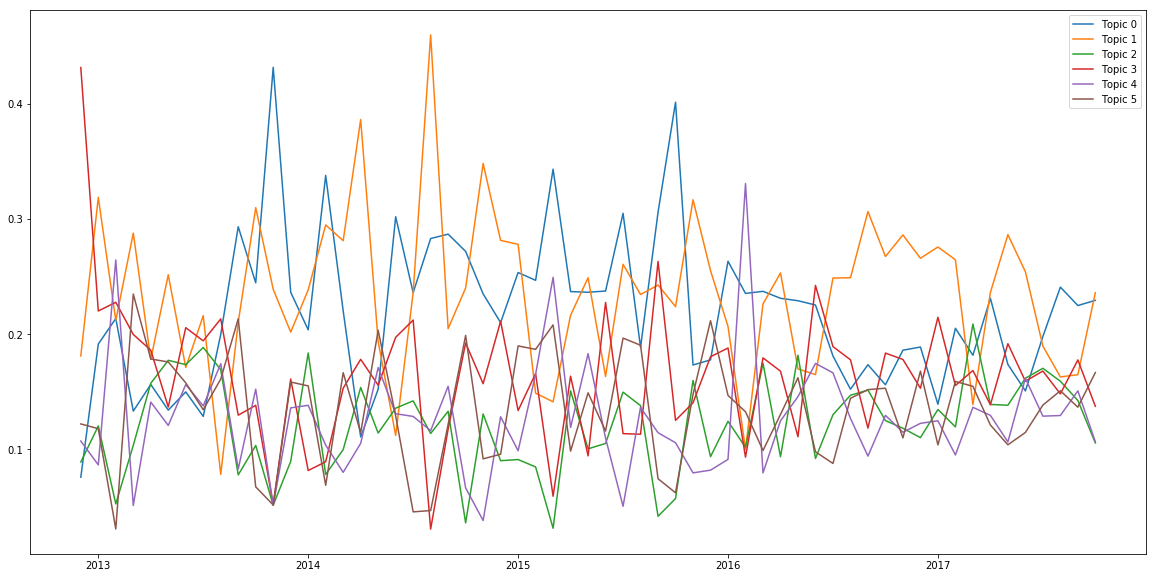

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10 ))
plt.plot(results)
plt.legend(["Topic "+str(i) for i in range(number_of_topics)])

In [26]:
processed_docs

0                       [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1             [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                      [bigajm]
3                                                                                                  [http, muhm]
4                                                             [place, earth, min, cost, seat, http, dgyddgttyd]
5       [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                            [earth, min, http]
7                                          [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                     [moon, base, alpha

In [27]:
lda_model

In [28]:
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [],
 [(2, 1)],
 [(2, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(2, 2), (11, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(2, 1), (14, 1), (15, 1)],
 [(2, 1), (14, 1), (18, 2)],
 [(2, 1), (7, 1)],
 [(2, 1), (21, 1), (22, 1), (23, 1)],
 [(2, 1),
  (8, 1),
  (11, 1),
  (14, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [],
 [(28, 1)],
 [(2, 1)],
 [(13, 1), (29, 1), (30, 1), (31, 1)],
 [(1, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [],
 [(2, 1), (27, 1), (38, 1), (39, 1)],
 [],
 [(2, 1), (11, 1), (26, 1), (32, 1), (40, 1), (41, 1)],
 [(39, 1)],
 [(42, 1), (43, 1)],
 [(2, 1), (11, 1), (26, 1), (32, 1), (40, 1)],
 [(3, 1), (44, 1)],
 [(2, 1), (45, 1), (46, 1)],
 [(39, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(29, 1), (51, 1)],
 [],
 [(2, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(2, 1), (56, 1), (57, 1)],
 [(54, 1), (58, 1)],
 [(59, 1)],
 [(2, 1

In [40]:
#Now let's average out those scores over the surrounding 1000 articles scores to see how average scores change over time
n = processed_docs.shape[0]
averages = []
i=0
start = 2012
end = 2017
dates = []
while(i<n):
    array = np.zeros((10,1))
    k=0
    pred = lda_model[bow_corpus[i]]
    for j in range(10):
        if j in [tup[0] for tup in pred]:
            array[j,:] = pred[k][1]
            k+=1
            
    running_sum = array
    print(array)
    break
    i+=1
    count = 0
    while (i)%500 != 0 and i<n:
        #print(i)
        array = np.zeros((10,1))
        k=0
        pred = lda_model[bow_corpus[i]]
        for j in range(10):
            if j in [tup[0] for tup in pred]:
                try:
                    array[j,:] = pred[k][1]
                    k+=1
                except:
                    print(i,array,j,k,pred)

        running_sum = running_sum + array
        i+=1
        count+=1
    averages.append(running_sum/count)
    dates.append(start + (end-start)*i/n)

[[0.02000602]
 [0.020004  ]
 [0.02000205]
 [0.02000689]
 [0.02000181]
 [0.81996679]
 [0.02000128]
 [0.0200017 ]
 [0.02000455]
 [0.02000487]]


In [23]:
averages = np.hstack(average for average in averages)
averages.shape

(10, 7)

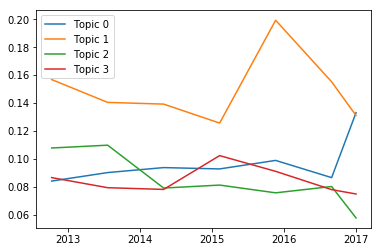

In [24]:
import matplotlib.pyplot as plt
plt.plot(dates,averages[:4,:].T)
plt.legend(["Topic "+str(i) for i in range(averages.shape[0])])